           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
5  1744-04-01               1.530                          4.680   Åland
6  1744-05-01               6.702                          1.789   Åland
7  1744-06-01              11.609                          1.577   Åland
8  1744-07-01              15.342                          1.410   Åland
9  1744-08-01                 NaN                            NaN   Åland
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------               

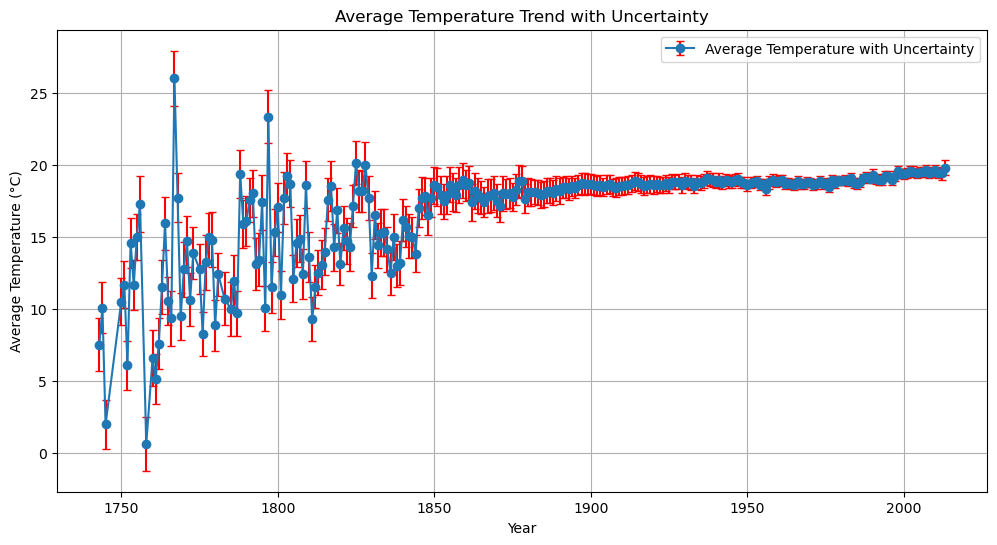

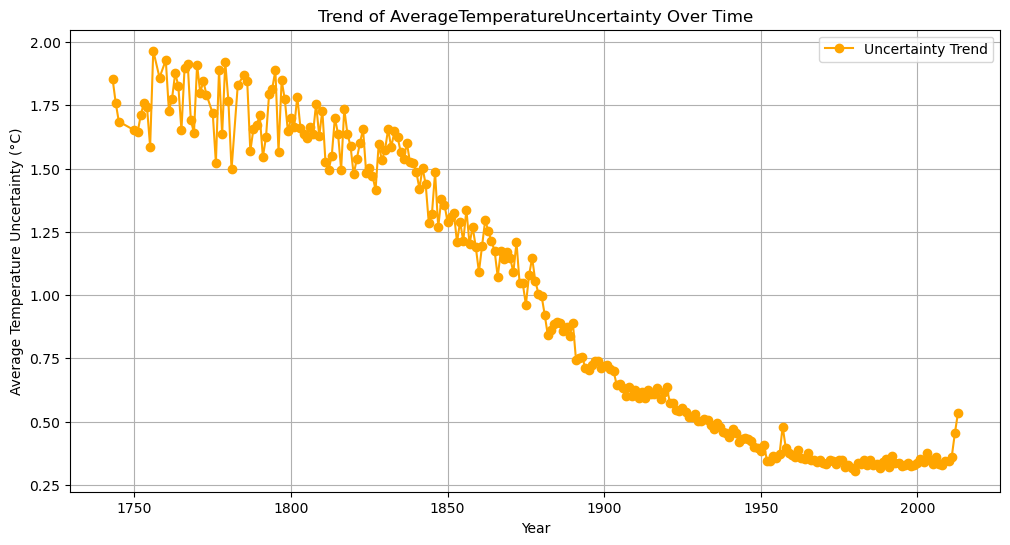


Years with high uncertainty:
 Empty DataFrame
Columns: [Year, AverageTemperature, AverageTemperatureUncertainty]
Index: []
Cleaned dataset saved as 'cleaned_temperatures.csv'.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'GlobalLandTemperaturesByCountry.csv'
data = pd.read_csv(data_path)

# Display the first 10 rows and dataset information
print(data.head(10))
print(data.info())
print(data.describe())

# Handle Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Drop rows with missing temperature values (optional)
data = data.dropna(subset=['AverageTemperature'])

# Parse the Date Column
data['dt'] = pd.to_datetime(data['dt'])
data['Year'] = data['dt'].dt.year
data['Month'] = data['dt'].dt.month

# Check for Data Consistency
# Filter Data Based on Uncertainty
threshold = 2.0
original_size = data.shape[0]
data_filtered = data[data['AverageTemperatureUncertainty'] <= threshold]
filtered_size = data_filtered.shape[0]

print(f"Original dataset size: {original_size}")
print(f"Filtered dataset size: {filtered_size}")

# Visualize Temperature Trend with Uncertainty
data_grouped = data_filtered.groupby('Year').agg({
    'AverageTemperature': 'mean',
    'AverageTemperatureUncertainty': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.errorbar(
    data_grouped['Year'],
    data_grouped['AverageTemperature'],
    yerr=data_grouped['AverageTemperatureUncertainty'],
    fmt='-o',
    ecolor='red',
    capsize=3,
    label='Average Temperature with Uncertainty'
)
plt.title('Average Temperature Trend with Uncertainty')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

# Analyze Trends in Uncertainty
plt.figure(figsize=(12, 6))
plt.plot(
    data_grouped['Year'],
    data_grouped['AverageTemperatureUncertainty'],
    '-o',
    label='Uncertainty Trend',
    color='orange'
)
plt.title('Trend of AverageTemperatureUncertainty Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature Uncertainty (°C)')
plt.legend()
plt.grid()
plt.show()

# Identify High-Uncertainty and Inconsistent Periods
high_uncertainty_years = data_grouped[data_grouped['AverageTemperatureUncertainty'] > threshold]
print("\nYears with high uncertainty:\n", high_uncertainty_years)

# Export the Cleaned Data
data_filtered.to_csv('cleaned_temperatures.csv', index=False)
print("Cleaned dataset saved as 'cleaned_temperatures.csv'.")
